<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS485: Data Science and Applications
## Assignment 2
### Vasileios Papageridis - csd4710

---

Submission deadline: Friday 1/3/2024 on elearn

---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/ee5a8decd5ca7b22312e1a34868526ea6c76b392/Images/gmm.png?raw=true')


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


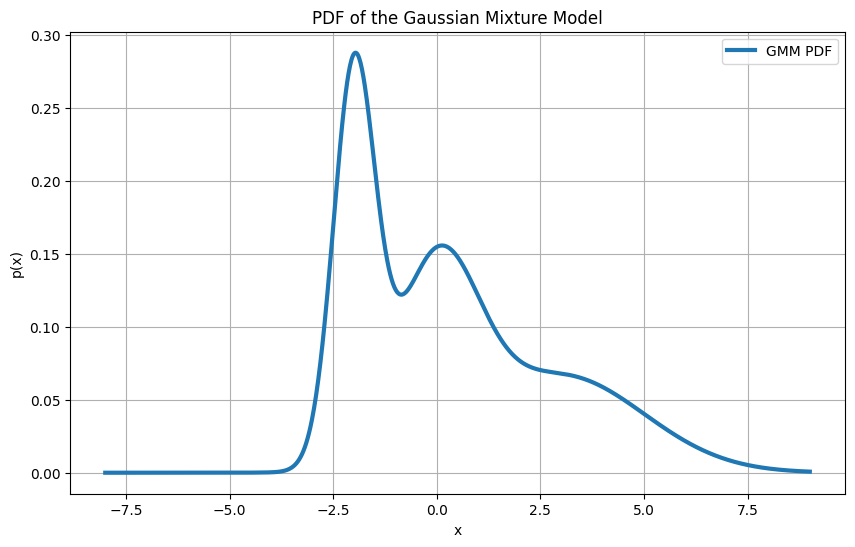

In [4]:
# Analyticall generate the GMM model pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# GMM parameters
K = 3
mus = [0, -2, 3]
sigmas = [1, 0.5, 2]
weights = [1/3, 1/3, 1/3]

# Generate points on the x axis
x_values = np.linspace(min(mus) - 3 * max(sigmas), max(mus) + 3 * max(sigmas), 1000)

# Calculate the total PDF of the GMM
gmm_pdf = np.zeros_like(x_values)
for i in range(K):
    gmm_pdf += weights[i] * norm.pdf(x_values, mus[i], sigmas[i])

plt.figure(figsize=(10, 6))
plt.plot(x_values, gmm_pdf, label='GMM PDF', linewidth=3)
plt.title('PDF of the Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Sample from the GMM and store the samples in np.vectors
sample_sizes = [100, 1000, 10000]

gmm_samples = {}

# Sampling from the GMM
np.random.seed(42)
for size in sample_sizes:
    chosen_gaussians = np.random.choice(K, size=size, p=weights)
    samples = np.array([np.random.normal(mus[i], sigmas[i]) for i in chosen_gaussians])
    gmm_samples[size] = samples


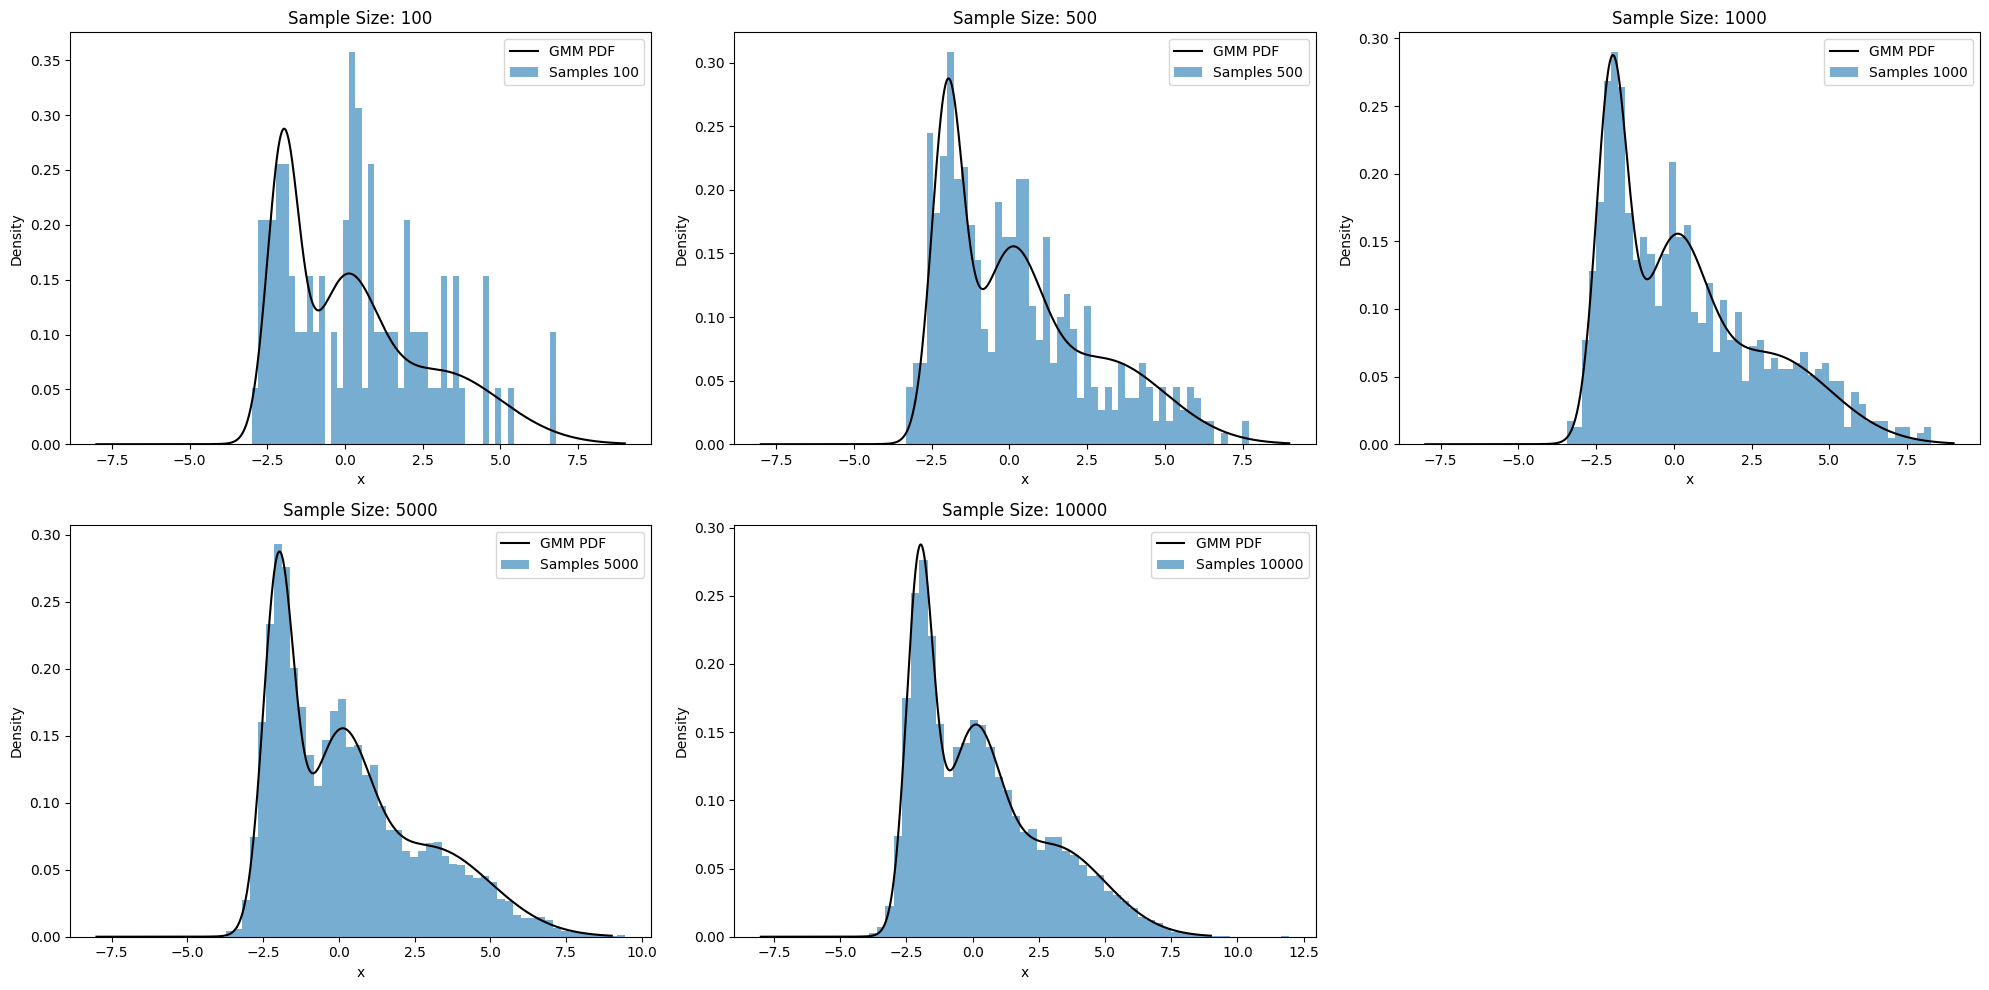

In [8]:
# Generate various plots for differnt sample sizes and show the convergence to the actual pdf
detailed_sample_sizes = [100, 500, 1000, 5000, 10000]

# Generate samples for the new sample sizes
for size in detailed_sample_sizes:
    if size not in gmm_samples:
        chosen_gaussians = np.random.choice(K, size=size, p=weights)
        samples = np.array([np.random.normal(mus[i], sigmas[i]) for i in chosen_gaussians])
        gmm_samples[size] = samples

plt.figure(figsize=(20, 10))

for i, size in enumerate(detailed_sample_sizes):
    plt.subplot(2, 3, i + 1)  # Create subplot for each sample size
    plt.plot(x_values, gmm_pdf, 'k-', label='GMM PDF')  # Plot the actual GMM PDF
    plt.hist(gmm_samples[size], bins=50, density=True, alpha=0.6, label=f'Samples {size}')  # Plot histogram of samples
    plt.title(f'Sample Size: {size}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


As sample sizes increase, the histograms, which represent the empirical distributions of the samples, progressively align more closely with the actual distribution of the Gaussian Mixture Model (GMM), depicted by the black line. This trend exemplifies the Law of Large Numbers in action: with an increasing number of samples, the empirical distribution steadily converges toward the actual underlying probability distribution.

The series of plots presented illustrates this phenomenon across varying sample sizes, from 100 to 10,000. In each case, the actual PDF of the GMM is rendered as a black line, while the sample histograms are superimposed in blue.

Noticeably, with larger sample sizes, the histograms become increasingly smooth and begin to more accurately reflect the true GMM PDF. This effect underscores the convergence of the empirical distribution towards the GMM's actual distribution. Specifically, observe the gradual alignment of histogram shapes and peaks with those of the GMM PDF, a transition most pronounced when advancing from smaller to larger sample sizes.

---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [9]:
# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Get data
data = load_breast_cancer(as_frame=True).data

# Printing head and tail of data frame to get some first view
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


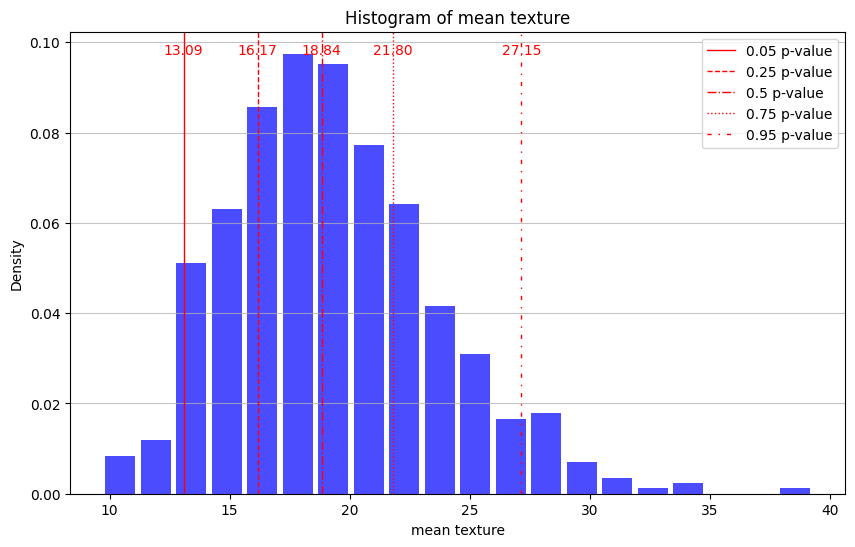

In [15]:
# Select a feature vector, plot its histogram and p-values with vertical axes
feature = 'mean texture'
feature_data = data[feature]

plt.figure(figsize=[10,6])
n, bins, patches = plt.hist(feature_data, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')

quantiles = np.quantile(feature_data, [0.05, 0.25, 0.5, 0.75, 0.95])
quantile_labels = ['0.05', '0.25', '0.5', '0.75', '0.95']

line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]
for q, label, ls in zip(quantiles, quantile_labels, line_styles):
    plt.axvline(q, color='r', linestyle=ls, linewidth=1)
    plt.text(q, plt.ylim()[1]*0.95, f'{q:.2f}', horizontalalignment='center', color='red')

custom_lines = [plt.Line2D([0], [0], color='r', lw=1, linestyle=ls) for ls in line_styles]
plt.legend(custom_lines, [f'{label} p-value' for label in quantile_labels], loc='upper right')

plt.grid(axis='y', alpha=0.75)
plt.show()

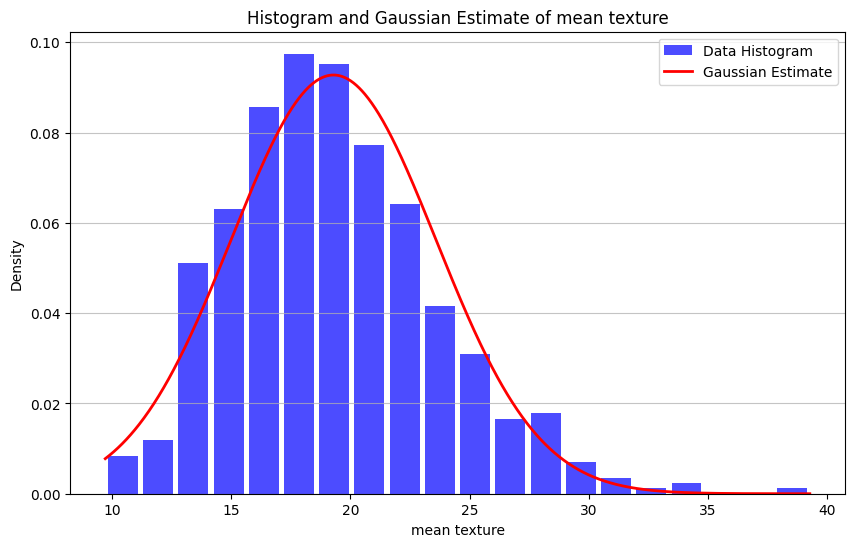

(19.289648506151142, 4.301035768166949)

In [18]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram

from scipy.stats import norm

x_values = np.linspace(feature_data.min(), feature_data.max(), 1000)

mean_estimate = np.mean(feature_data)
std_estimate = np.std(feature_data, ddof=1) 

# Compute the y values for the Gaussian distribution using the mean and std estimates
y_values = (1 / (np.sqrt(2 * np.pi) * std_estimate)) * np.exp(-0.5 * ((x_values - mean_estimate) / std_estimate) ** 2)

plt.figure(figsize=[10,6])
plt.hist(feature_data, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True, label='Data Histogram')
plt.title(f'Histogram and Gaussian Estimate of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')

# Plot the Gaussian estimate
plt.plot(x_values, y_values, 'r-', linewidth=2, label='Gaussian Estimate')

plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)
plt.show()

mean_estimate, std_estimate


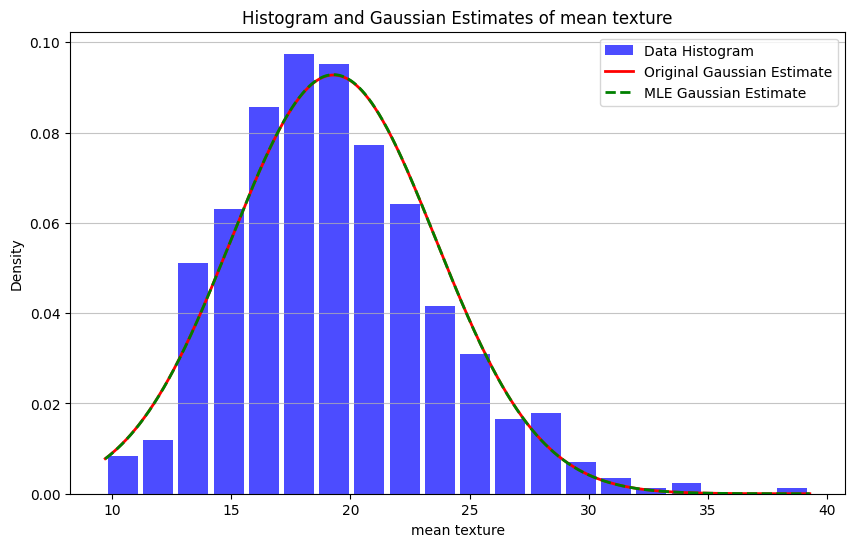

(19.289648506151142, 4.297254637090421)

In [22]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)

mu_mle = np.sum(feature_data) / len(feature_data)   # MLE for mean is the sample mean
sigma_mle = np.sqrt(np.sum((feature_data - mu_mle) ** 2) / len(feature_data))  # MLE for std is the sample std

y_values_mle = norm.pdf(x_values, mu_mle, sigma_mle)

plt.figure(figsize=[10,6])
plt.hist(feature_data, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True, label='Data Histogram')
plt.title(f'Histogram and Gaussian Estimates of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')

# Plot the original Gaussian estimate
plt.plot(x_values, y_values, 'r-', linewidth=2, label='Original Gaussian Estimate')

# Plot the MLE Gaussian estimate
plt.plot(x_values, y_values_mle, 'g--', linewidth=2, label='MLE Gaussian Estimate')

plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

mu_mle, sigma_mle


---

# Maximum Likelihood Estimation for Gaussian Distribution
The Gaussian (or Normal) distribution is characterized by two parameters: the mean $\mu$ and the standard deviation $\sigma$. The pdf of a Gaussian distribution is given by:

\begin{equation}
f(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

Here, the function $f(x|\mu,\sigma)$ is fully parametrized by the vector $\vec{\theta} = [\mu, \sigma]$. These parameters fully describe the distribution.

If we observe a random variable that we believe follows a Gaussian distribution, we want to find the best instance of this family of functions, parametrized by $\mu$ and $\sigma$, that best captures the observed data.

- We define the likelihood of observing a sample given the model as $p(x|\theta) = f_{X,\theta}(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$.
- Assuming we have a vector of i.i.d. data (independent and identically distributed) $\vec{x} = [x_1, x_2, \ldots, x_N]$, we define the likelihood of observing these samples, given our model described by $\vec{\theta} = [\mu, \sigma]$, as $\mathbb{L}(\mathbf{x};\mu,\sigma) = \prod_{i=1}^{N} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$.
- We find the values of $\mu$ and $\sigma$ that best describe the data distribution by maximizing the likelihood above. This is equivalent to maximizing the Log Likelihood due to the monotonic nature of the logarithm function.
- We thus formulate the problem as follows:

\begin{align}
\text{argmax}_{\mu,\sigma} \prod_{i=1}^{N} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} &= \text{argmax}_{\mu,\sigma} \log(\prod_{i=1}^{N} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}) \\
&= \text{argmax}_{\mu,\sigma} \sum_{i=1}^{N} \log(\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}) \\
&= \text{argmax}_{\mu,\sigma} N\log(\frac{1}{\sigma\sqrt{2\pi}}) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2 \\
\end{align}

- We can now find the values of $\mu$ and $\sigma$ that maximize the log likelihood by taking the partial derivatives of the log likelihood with respect to $\mu$ and $\sigma$, setting them to zero, and solving for $\mu$ and $\sigma$. This will give us the Maximum Likelihood Estimates (MLE) for $\mu$ and $\sigma$.

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} y_i,
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2.
$$

## Proof:

The likelihood function for each observation is given by the probability density function of the normal distribution

$$
p(y_i|\mu, \sigma^2) = \mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left(-\frac{1}{2} \left(\frac{y_i - \mu}{\sigma}\right)^2\right),
$$

and because observations are independent, the likelihood function for all observations is the product of the individual ones:

$$
p(y|\mu, \sigma^2) = \prod_{i=1}^{n} p(y_i|\mu) = \left(\frac{1}{\sqrt{(2\pi\sigma^2)}}\right)^n \cdot \exp\left(-\frac{1}{2} \sum_{i=1}^{n} \left(\frac{y_i - \mu}{\sigma}\right)^2\right).
$$


## Development of the Log-Likelihood Function for Gaussian Distribution

This can be developed into:

$$
p(y|\mu, \sigma^2) = \left( \frac{1}{2\pi\sigma^2} \right)^{n/2} \exp\left( -\frac{1}{2} \left[ \sum_{i=1}^{n} \left( \frac{y_i^2 - 2y_i\mu + \mu^2}{\sigma^2} \right) \right] \right)
$$

$$
= \left( \frac{1}{2\pi\sigma^2} \right)^{n/2} \exp\left( -\frac{1}{2\sigma^2} \left( y^Ty - 2n\bar{y}\mu + n\mu^2 \right) \right),
$$

where $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ is the mean of data points and $y^Ty = \sum_{i=1}^{n} y_i^2$ is the sum of squared data points.

Thus, the log-likelihood function is

$$
LL(\mu, \sigma^2) = \log p(y|\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \left( y^Ty - 2n\bar{y}\mu + n\mu^2 \right).
$$

### Derivation of Maximum Likelihood Estimates:

The derivative of the log-likelihood function with respect to $\mu$ is:

$$
\frac{dLL(\mu, \sigma^2)}{d\mu} = \frac{n\bar{y}}{\sigma^2} - \frac{n\mu}{\sigma^2} = \frac{n}{\sigma^2} (\bar{y} - \mu)
$$

And setting this derivative to zero gives the MLE for $\mu$:

$$
\frac{dLL(\hat{\mu}, \sigma^2)}{d\mu} = 0
$$

$$
0 = \frac{n}{\sigma^2} (\bar{y} - \hat{\mu})
$$

$$
0 = \bar{y} - \hat{\mu}
$$

$$
\hat{\mu} = \bar{y}
$$

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} y_i.
$$


This can be developed into

$$
p(y|\mu, \sigma^2) = \left( \frac{1}{2\pi\sigma^2} \right)^{n/2} \cdot \exp\left( -\frac{1}{2} \left[ \sum_{i=1}^n \frac{(y_i^2 - 2y_i\mu + \mu^2)}{\sigma^2} \right] \right)
$$

$$
= \left( \frac{1}{2\pi\sigma^2} \right)^{n/2} \cdot \exp\left( -\frac{1}{2\sigma^2} (\mathbf{y}^T\mathbf{y} - 2n\bar{y}\mu + n\mu^2) \right),
$$

where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ is the mean of data points and $\mathbf{y}^T\mathbf{y} = \sum_{i=1}^n y_i^2$ is the sum of squared data points.

Thus, the log-likelihood function is

$$
LL(\mu, \sigma^2) = \log p(y|\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (\mathbf{y}^T\mathbf{y} - 2n\bar{y}\mu + n\mu^2).
$$

The derivative of the log-likelihood function with respect to $\mu$ is

$$
\frac{dLL(\mu, \sigma^2)}{d\mu} = \frac{n\bar{y}}{\sigma^2} - \frac{n\mu}{\sigma^2} = \frac{n}{\sigma^2} (\bar{y} - \mu),
$$

and setting this derivative to zero gives the MLE for $\mu$:

$$
\frac{dLL(\hat{\mu}, \sigma^2)}{d\mu} = 0
$$

$$
0 = \frac{n}{\sigma^2} (\bar{y} - \hat{\mu})
$$

$$
0 = \bar{y} - \hat{\mu}
$$

$$
\hat{\mu} = \bar{y}
$$

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n y_i.
$$

The derivative of the log-likelihood function at $\hat{\mu}$ with respect to $\sigma^2$ is

$$
\frac{dLL(\hat{\mu}, \sigma^2)}{d\sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \left( \mathbf{y}^T\mathbf{y} - 2n\bar{y}\hat{\mu} + n\hat{\mu}^2 \right)
$$

$$
= -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (y_i^2 - 2y_i\hat{\mu} + \hat{\mu}^2)
$$

$$
= -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (y_i - \hat{\mu})^2,
$$

and setting this derivative to zero gives the MLE for $\sigma^2$:

$$
\frac{dLL(\hat{\mu}, \hat{\sigma}^2)}{d\sigma^2} = 0
$$

$$
0 = \frac{1}{2(\hat{\sigma}^2)^2} \sum_{i=1}^n (y_i - \hat{\mu})^2
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{\mu})^2
$$

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2.
$$

---